

# Coursework 2 - Loan Default Probability 

The goal of this case study is to build a machine learning model to predict the probability that a loan will default. By the end of the analysis you should be able to recommend a choice of model and associated hyperparameters.

You must send upload workbook by midnight on Sunday 14th November. Make sure you have answered all of the questions below. 

I will provide you with guidance on what to do. Please follow it. You can discuss and propose your own suggestions at the end.

Make sure it is clear and that it runs without errors - you can ensure this by doing "restart and run all"

The comment

In [1]:
# DO THIS HERE

is a guide for you but is not strict - you can use more cells or less. If you want to try other things then you can but it is not gauranteed to raise your score. What I want you to do is to do the things I ask for well and to explain them clearly. 

In [101]:
# Disable the warnings
import warnings
warnings.filterwarnings('ignore')

## Overview

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Data Preparation and Feature Selection](#2)
    * [3.1. Preparing the predicted variable](#2.1)    
    * [3.2. Feature Selection-Limit the Feature Space](#2.2)
        * [3.2.1.  Features elimination by significant missing values ](#2.2.1)
        * [3.2.2.  Features elimination based on the intutiveness](#2.2.2)
        * [3.2.3.  Features elimination based on the correlation](#2.2.3)   
* [4. Feature Engineering and Exploratory Analysis](#3)
    * [4.1 Feature Analysis and Exploration](#3.1)
        * [4.1.1. Analysing the categorical features](#3.1.1)
        * [4.1.2  Analysing the continuous features ](#3.1.2) 
    * [4.2.Encoding Categorical Data](#3.2)
    * [4.3.Sampling Data](#3.3)    
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Test Options and Evaluation Metrics](#4.2)
    * [5.3. Compare Models and Algorithms](#4.3)
* [6. Model Tuning and Grid Search](#5)  
* [7. Finalize the Model](#6)  
    * [7.1. Results on test dataset](#6.1)
    * [7.1. Variable Intuition/Feature Selection](#6.2) 
    * [7.3. Save model for later use](#6.3)


<a id='0'></a>
# 1. Problem Definition

This case study aims to analyze data for loans through 2007-2017Q3 from Lending Club available on Kaggle. Dataset contains over 887 thousand observations and 150 variables among which one is describing the loan status. The predicted variable is “Charge-Off ”. A charge-off is a debt that a creditor has given up trying to collect on after you’ve missed payments for several months. You want a model that can predict charge-off.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

## 2.1. Load all the python packages you need here

In [102]:
# DO THIS HERE
import numpy as np     
import pandas as pd     
import matplotlib.pyplot as plt     
%matplotlib inline
import matplotlib as mpl    
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
pd.set_option('display.max_columns', None)

<a id='1.2'></a>
## 2.2. Loading the Data

### Load the data in this step. This is in the form of a zipped csv file LoansData_sample.csv.gz - see how you load a zipped csv file in the pandas documentation. Use a utf-8 encoding. Call the dataframe "dataset"

In [103]:
# Read the Zipped CSV file using utf-8 coding
dataset = pd.read_csv('LoansData_sample.csv.gz', compression='gzip', low_memory=False, index_col=0, encoding='utf-8')
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0.0,Aug-1994,750.0,754.0,0.0,NaN,NaN,6.0,0.0,138008.0,29.0,17.0,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,684.0,680.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,149140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500.0,NaN,NaN,NaN,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,NaN,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0.0,Sep-1989,710.0,714.0,2.0,42.0,NaN,17.0,0.0,6133.0,31.6,36.0,w,0.00,0.00,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,564.0,560.0,0.0,59.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,162110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400.0,NaN,NaN,NaN,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,42.0,1.0,42.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Examine the properties of the data frame

In [105]:
# Check the dataset shape
print('Dataset Shape : ', dataset.shape)

Dataset Shape :  (100000, 150)


In [107]:
# Check the dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Columns: 150 entries, id to settlement_term
dtypes: float64(115), int64(1), object(34)
memory usage: 115.2+ MB


In [108]:
# Check the dataset column names
print('Columns of dataset : ', dataset.columns)

Columns of dataset :  Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)


<a id='2'></a>
## 3. Data Preparation and Feature Selection

<a id='2.1'></a>
## 3.1. Preparing the predicted variable


### The column to predict is loan_status. Look at the values it takes and their counts.

In [109]:
# Examine our target feature loan_statues and check its values
predictor = dataset['loan_status']
predictor.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)',
       'Late (16-30 days)', 'In Grace Period', 'Default'], dtype=object)

In [110]:
predictor.value_counts()

Fully Paid            69982
Charged Off           16156
Current               12726
Late (31-120 days)      730
In Grace Period         264
Late (16-30 days)       139
Default                   3
Name: loan_status, dtype: int64

### You need to try to learn differences in the features between completed loans that have been fully paid or charged off. Don't consider loans that are current, don't meet the credit policy, defaulted, or have a missing status. So only keep the loans with status "Fully Paid" or "Charged Off." Count the number of each.

In [111]:
# Keep the required status : Fully paid and Charged off and count the number
dataset_1 = pd.concat([dataset[dataset.loan_status == 'Fully Paid'],dataset[dataset.loan_status == 'Charged Off']],axis=0)
dataset_1.loan_status.value_counts()

Fully Paid     69982
Charged Off    16156
Name: loan_status, dtype: int64

### Is this an unbalanced dataset ?

In [112]:
# compute the fully paid rate and charged off rate 
print('Fully Paid Percentage = ', 69982/(69982+16156))
print('Charged Off Percentage = ', 16156/(69982+16156))

Fully Paid Percentage =  0.8124405024495577
Charged Off Percentage =  0.18755949755044232


* We can notice that the dataset is not balanced

### Set the labels to be 1 for Charged off else 0

In [113]:
# Set the labels 0: Fully paid and 1: Charged off
emb_mapping = {'Fully Paid':0, 'Charged Off':1}
dataset_1['loan_status'] = dataset_1.loan_status.map(emb_mapping)
dataset_1.loan_status.value_counts()

0    69982
1    16156
Name: loan_status, dtype: int64

<a id='2.2'></a>
## 3.2. Feature Selection-Limit the Feature Space 

The full dataset has 150 features for each
loan. We’ll eliminate
features in following steps using three different approaches:
* Eliminate feature that have more than 30% missing values.
* Eliminate features that are unintuitive based on subjective judgement - I will give you these.
* Eliminate features with low correlation with the predicted variable

<a id='2.2.1'></a>
### 3.2.1.  Features elimination by significant missing values

### Calculating the percentage of missing data for each feature using isnull().mean():

In [115]:
# Compute the percentage of missing data
null_col = dataset_1.columns[dataset_1.isnull().any()]
missingdata = dataset_1[null_col].isnull().mean()
print(missingdata)

member_id                 1.000000
emp_title                 0.054819
emp_length                0.054761
desc                      0.999930
mths_since_last_delinq    0.485291
                            ...   
settlement_status         0.985407
settlement_date           0.985407
settlement_amount         0.985407
settlement_percentage     0.985407
settlement_term           0.985407
Length: 70, dtype: float64


### Drop the columns with more than 30% of missing data.

In [116]:
# DO THIS HERE
for i in range(len(missingdata)):
    if missingdata[i] > 0.3:
        dataset_1 = dataset_1.drop([missingdata.index[i]],axis=1)
dataset_1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,38098114,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,0,n,debt_consolidation,Debt consolidation,235xx,VA,12.03,0.0,Aug-1994,750.0,754.0,0.0,6.0,0.0,138008.0,29.0,17.0,w,0.0,0.0,17392.37,17392.37,15000.0,2392.37,0.0,0.0,0.0,Jun-2016,12017.81,Nov-2017,684.0,680.0,0.0,1.0,Individual,0.0,0.0,149140.0,184500.0,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,N,Cash,N
2,37842129,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,Programming Analysis Supervisor,6 years,RENT,63800.0,Source Verified,Dec-2014,0,n,credit_card,Credit card refinancing,658xx,MO,18.49,0.0,Aug-2003,685.0,689.0,0.0,10.0,0.0,16374.0,76.2,35.0,w,0.0,0.0,25512.20,25512.20,21425.0,4087.20,0.0,0.0,0.0,May-2016,17813.19,Dec-2017,704.0,700.0,0.0,1.0,Individual,0.0,0.0,42315.0,21500.0,4.0,4232.0,324.0,97.8,0.0,0.0,135.0,136.0,7.0,7.0,0.0,7.0,7.0,1.0,3.0,4.0,3.0,12.0,16.0,5.0,18.0,4.0,10.0,0.0,0.0,0.0,2.0,91.4,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0,N,Cash,N
5,37822187,9600.0,9600.0,9600.0,36 months,13.66,326.53,C,C3,Admin Specialist,10+ years,RENT,69000.0,Source Verified,Dec-2014,0,n,debt_consolidation,Debt consolidation,077xx,NJ,25.81,0.0,Nov-1992,680.0,684.0,0.0,12.0,0.0,16388.0,59.4,44.0,f,0.0,0.0,9973.43,9973.43,9600.0,373.43,0.0,0.0,0.0,Apr-2015,9338.58,Dec-2017,724.0,720.0,0.0,1.0,Individual,0.0,0.0,38566.0,27600.0,8.0,3214.0,6494.0,69.2,0.0,0.0,183.0,265.0,23.0,3.0,0.0,24.0,17.0,0.0,4.0,7.0,5.0,16.0,17.0,8.0,26.0,7.0,12.0,0.0,0.0,0.0,3.0,100.0,60.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,N,Cash,N
6,37741884,2500.0,2500.0,2500.0,36 months,11.99,83.03,B,B5,Manufacturing Engineer,< 1 year,MORTGAGE,89000.0,Source Verified,Dec-2014,0,n,home_improvement,Home improvement,554xx,MN,13.77,0.0,Oct-2001,685.0,689.0,1.0,9.0,0.0,22908.0,94.3,32.0,f,0.0,0.0,2622.22,2622.22,2500.0,122.22,0.0,0.0,0.0,Jun-2015,2294.26,Dec-2017,769.0,765.0,0.0,1.0,Individual,0.0,0.0,397223.0,24300.0,6.0,44136.0,1333.0,86.4,0.0,0.0,158.0,148.0,24.0,6.0,5.0,24.0,2.0,0.0,3.0,4.0,3.0,6.0,17.0,4.0,10.0,4.0,9.0,0.0,0.0,0.0,1.0,96.8,66.7,0.0,0.0,415290.0,61606.0,9800.0,47946.0,N,Cash,N
7,37854444,16000.0,16000.0,16000.0,60 months,11.44,351.40,B,B4,Foreign Service Officer,6 years,OWN,109777.0,Verified,Dec-2014,0,n,debt_consolidation,Debt consolidation,201xx,VA,11.63,1.0,Nov-2003,700.0,704.0,0.0,7.0,0.0,7253.0,60.4,14.0,w,0.0,0.0,18586.72,18586.72,16000.0,2586.72,0.0,0.0,0.0,Sep-2016,4935.54,Oct-2016,669.0,665.0,0.0,1.0,Individual,0.0,0.0,373743.0,12000.0,3.0,53392.0,2559.0,72.2,0.0,0.0,121.0,133.0,17.0,17.0,2

### How large is the remaining dataset ?

In [117]:
# check the new shape of the dataset
dataset_1.shape

(86138, 92)

<a id='2.2.2'></a>
### 3.2.2.  Features elimination based on the intutiveness

### In order to filter the features further I checked the description in the data dictionary and keep the features that are intuitive on the basis of subjective judgement. To do so I examine the LendingClub website and Data Dictionary to determine which features would have been available to potential investors. Here's the list of features I have decided to keep. Can you do the same.

In [118]:
keep_list = ['charged_off','funded_amnt','addr_state', 'annual_inc', 'application_type', 
             'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 
             'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 
             'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 
             'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 
             'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code',
             'last_pymnt_amnt','num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op',
             "bc_util","bc_open_to_buy","avg_cur_bal","acc_open_past_24mths" ]

### Drop all of the features except these ones from the dataset.

In [119]:
# List all the feature columns
col = dataset_1.columns
col

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_

In [120]:
# List the feature that we want to drop
cols_to_drop = [drop for drop in col if drop not in keep_list]
cols_to_drop

['funded_amnt_inv',
 'issue_d',
 'pymnt_plan',
 'delinq_2yrs',
 'inq_last_6mths',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_rcnt_tl',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'hards

In [121]:
#Drop the features in cols_to_drop
for i in range(len(cols_to_drop)):
    dataset_1 = dataset_1.drop([cols_to_drop[i]],axis=1)
dataset_1.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_pymnt_amnt,application_type,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl,pub_rec_bankruptcies
0,38098114,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,0,debt_consolidation,Debt consolidation,235xx,VA,12.03,Aug-1994,750.0,754.0,6.0,0.0,138008.0,29.0,17.0,w,12017.81,Individual,5.0,29828.0,9525.0,4.7,244.0,1.0,0.0,4.0,0.0
2,37842129,21425.0,21425.0,60 months,15.59,516.36,D,D1,Programming Analysis Supervisor,6 years,RENT,63800.0,Source Verified,0,credit_card,Credit card refinancing,658xx,MO,18.49,Aug-2003,685.0,689.0,10.0,0.0,16374.0,76.2,35.0,w,17813.19,Individual,4.0,4232.0,324.0,97.8,136.0,7.0,0.0,4.0,0.0
5,37822187,9600.0,9600.0,36 months,13.66,326.53,C,C3,Admin Specialist,10+ years,RENT,69000.0,Source Verified,0,debt_consolidation,Debt consolidation,077xx,NJ,25.81,Nov-1992,680.0,684.0,12.0,0.0,16388.0,59.4,44.0,f,9338.58,Individual,8.0,3214.0,6494.0,69.2,265.0,23.0,0.0,7.0,0.0
6,37741884,2500.0,2500.0,36 months,11.99,83.03,B,B5,Manufacturing Engineer,< 1 year,MORTGAGE,89000.0,Source Verified,0,home_improvement,Home improvement,554xx,MN,13.77,Oct-2001,685.0,689.0,9.0,0.0,22908.0,94.3,32.0,f,2294.26,Individual,6.0,44136.0,1333.0,86.4,148.0,24.0,5.0,4.0,0.0
7,37854444,16000.0,16000.0,60 months,11.44,351.40,B,B4,Foreign Service Officer,6 years,OWN,109777.0,Verified,0,debt_consolidation,Debt consolidation,201xx,VA,11.63,Nov-2003,700.0,704.0,7.0,0.0,7253.0,60.4,14.0,w,4935.54,Individual,3.0,53392.0,2559.0,72.2,133.0,17.0,2.0,3.0,0.0


### How large is the remaining dataset ?

In [122]:
# check the shape
dataset_1.shape

(86138, 39)

<a id='2.2.3'></a>
### 3.2.3.  Features elimination based on the correlation

### Now remove all of the features with a correlation of under 3% with the  charge-off label. List the names of the features you are removing.

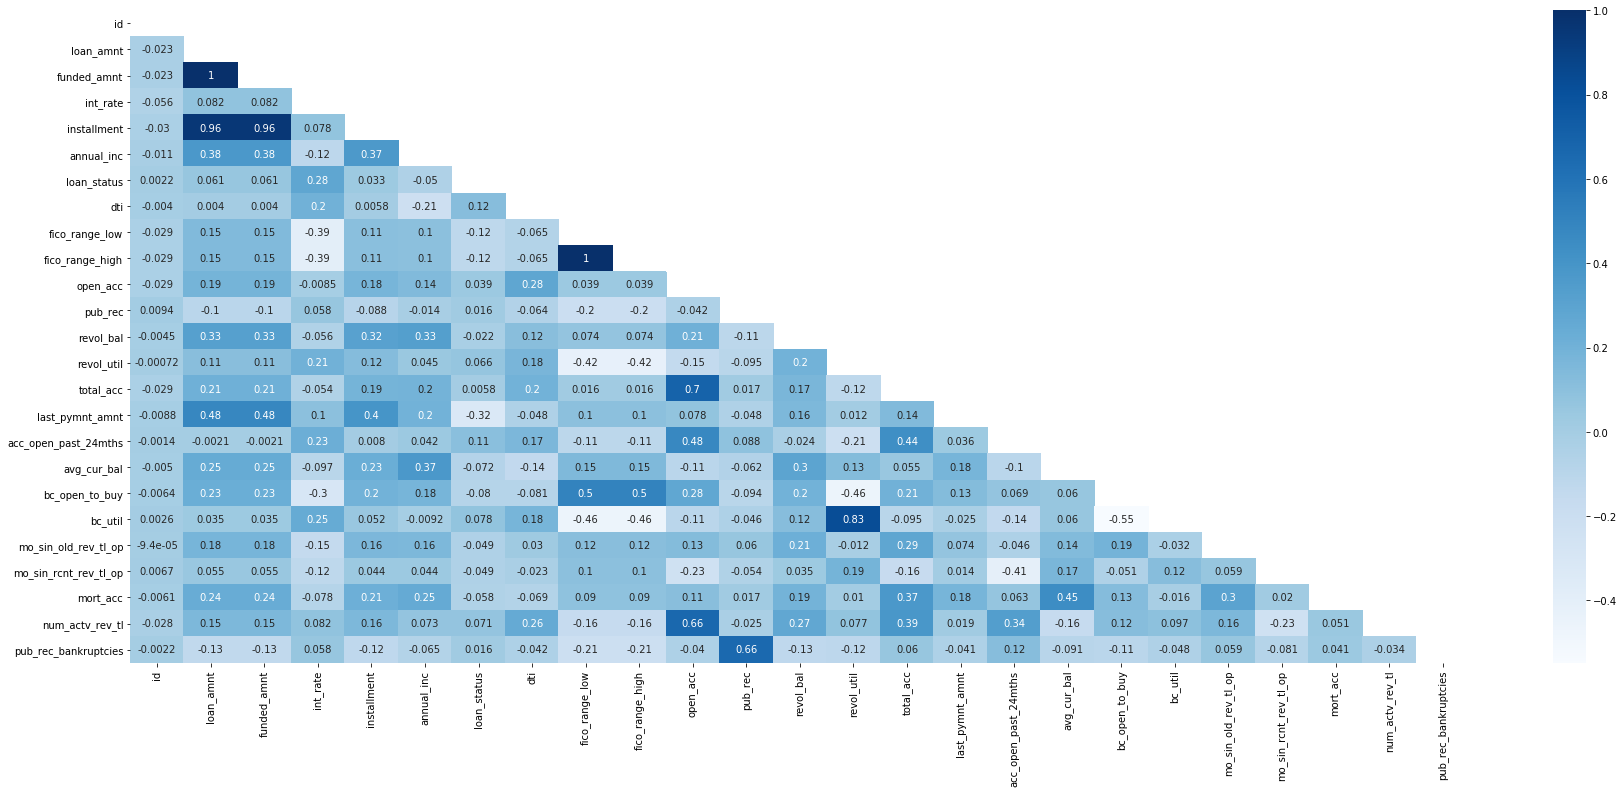

In [123]:
# Let's check te correalation matrix
corr = dataset_1.corr(method='pearson')
plt.figure(figsize=(30,12))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,cmap=mpl.cm.Blues,annot=True)

In [124]:
# Drop the features that have less than 0.03 correlation with loan_status as required
drop_list=[]
for i in range(len(corr)):
    if abs(corr['loan_status'][i]) < 0.03:
        dataset_1 = dataset_1.drop([corr.columns[i]],axis=1)
        drop_list.append(corr.columns[i])
dataset_1.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,revol_util,initial_list_status,last_pymnt_amnt,application_type,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl
0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,0,debt_consolidation,Debt consolidation,235xx,VA,12.03,Aug-1994,750.0,754.0,6.0,29.0,w,12017.81,Individual,5.0,29828.0,9525.0,4.7,244.0,1.0,0.0,4.0
2,21425.0,21425.0,60 months,15.59,516.36,D,D1,Programming Analysis Supervisor,6 years,RENT,63800.0,Source Verified,0,credit_card,Credit card refinancing,658xx,MO,18.49,Aug-2003,685.0,689.0,10.0,76.2,w,17813.19,Individual,4.0,4232.0,324.0,97.8,136.0,7.0,0.0,4.0
5,9600.0,9600.0,36 months,13.66,326.53,C,C3,Admin Specialist,10+ years,RENT,69000.0,Source Verified,0,debt_consolidation,Debt consolidation,077xx,NJ,25.81,Nov-1992,680.0,684.0,12.0,59.4,f,9338.58,Individual,8.0,3214.0,6494.0,69.2,265.0,23.0,0.0,7.0
6,2500.0,2500.0,36 months,11.99,83.03,B,B5,Manufacturing Engineer,< 1 year,MORTGAGE,89000.0,Source Verified,0,home_improvement,Home improvement,554xx,MN,13.77,Oct-2001,685.0,689.0,9.0,94.3,f,2294.26,Individual,6.0,44136.0,1333.0,86.4,148.0,24.0,5.0,4.0
7,16000.0,16000.0,60 months,11.44,351.40,B,B4,Foreign Service Officer,6 years,OWN,109777.0,Verified,0,debt_consolidation,Debt consolidation,201xx,VA,11.63,Nov-2003,700.0,704.0,7.0,60.4,w,4935.54,Individual,3.0,53392.0,2559.0,72.2,133.0,17.0,2.0,3.0


In [125]:
# Print the the list that we dropped
drop_list

['id', 'pub_rec', 'revol_bal', 'total_acc', 'pub_rec_bankruptcies']

### How large is the resulting dataset ?

In [126]:
# check again the shape
dataset_1.shape

(86138, 34)

<a id='3'></a>
# 4. Feature Engineering and Exploratory Analysis

### Examine the properties of the remaining features.

In [127]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86138 entries, 0 to 99998
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              86138 non-null  float64
 1   funded_amnt            86138 non-null  float64
 2   term                   86138 non-null  object 
 3   int_rate               86138 non-null  float64
 4   installment            86138 non-null  float64
 5   grade                  86138 non-null  object 
 6   sub_grade              86138 non-null  object 
 7   emp_title              81416 non-null  object 
 8   emp_length             81421 non-null  object 
 9   home_ownership         86138 non-null  object 
 10  annual_inc             86138 non-null  float64
 11  verification_status    86138 non-null  object 
 12  loan_status            86138 non-null  int64  
 13  purpose                86138 non-null  object 
 14  title                  86138 non-null  object 
 15  zi

Text(55000, 1, '0: Fully Paid')

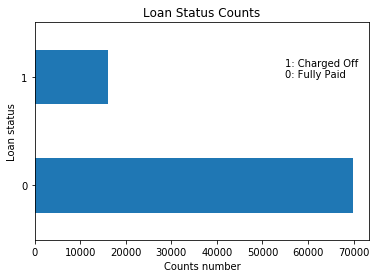

In [128]:
# Check the loan_status target
dataset_1['loan_status'].value_counts().plot(kind='barh')
plt.title('Loan Status Counts')
plt.xlabel('Counts number')
plt.ylabel('Loan status')
plt.text(55000,1.1,"1: Charged Off")
plt.text(55000,1,"0: Fully Paid")

In [130]:
# check the statistics amoung all features
dataset_1.describe()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,loan_status,dti,fico_range_low,fico_range_high,open_acc,revol_util,last_pymnt_amnt,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl
count,86138.000000,86138.000000,86138.000000,86138.000000,8.613800e+04,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86094.000000,86138.000000,86138.000000,86138.000000,85142.000000,85089.000000,86138.000000,86138.000000,86138.000000,86138.000000
mean,14106.526446,14106.526446,13.002360,430.737187,7.384311e+04,0.187559,18.532747,692.462966,696.463024,11.746453,54.582777,4757.453184,4.594732,13066.638371,8942.506507,63.808959,183.524333,12.796896,1.748880,5.762358
std,8391.139221,8391.139221,4.397419,251.653139,5.929352e+04,0.390362,8.538247,29.731549,29.731848,5.433122,23.515901,6466.767327,3.070996,16232.739293,14100.186250,27.051347,93.266430,16.224586,2.091488,3.224598
min,1000.000000,1000.000000,6.000000,30.420000,4.000000e+03,0.000000,0.000000,660.000000,664.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,7800.000000,7800.000000,9.490000,248.480000,4.500000e+04,0.000000,12.070000,670.000000,674.000000,8.000000,37.200000,358.522500,2.000000,3010.000000,1087.000000,44.100000,118.000000,3.000000,0.000000,3.000000
50%,12000.000000,12000.000000,12.990000,370.480000,6.247372e+04,0.000000,17.950000,685.000000,689.000000,11.000000,54.900000,1241.230000,4.000000,6994.500000,3823.000000,67.700000,167.000000,8.000000,1.000000,5.000000
75%,20000.000000,20000.000000,15.610000,568.005000,9.000000e+04,0.000000,24.500000,705.000000,709.000000,14.000000,72.500000,7303.205000,6.000000,17905.000000,10588.000000,87.500000,232.000000,15.000000,3.000000,7.000000
max,35000.000000,35000.000000,26.060000,1408.130000,7.500000e+06,1.000000,39.990000,845.000000,850.000000,84.000000,180.300000,36234.440000,53.000000,447433.000000,249625.000000,255.200000,718.000000,372.000000,34.000000,38.000000


<a id='3.1'></a>
## 4.1 Feature Analysis and Exploration

<a id='3.1.1'></a>
### 4.1.1. Analysing the categorical features 

### List the categorical features and take a decision on what to do with them - drop them or process them. Explain your decisions.

In [131]:
# List the categorical features
print([column for column in dataset_1.columns if dataset_1[column].dtype == object])

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'application_type']


In [148]:
for i in range(len(dataset_1.select_dtypes(include=['object']).columns)):
    print(str(dataset_1.select_dtypes(include=['object']).columns[i]) + " - labels number = ",len(dataset_1.select_dtypes(include=['object']).iloc[:,i].unique()),"\n")

term - labels number =  2 

grade - labels number =  7 

sub_grade - labels number =  35 

emp_title - labels number =  32988 

emp_length - labels number =  12 

home_ownership - labels number =  4 

verification_status - labels number =  3 

purpose - labels number =  13 

title - labels number =  20 

zip_code - labels number =  846 

addr_state - labels number =  46 

earliest_cr_line - labels number =  598 

initial_list_status - labels number =  2 

application_type - labels number =  1 



* We drop the **emp_title** feature,**zip_code** and **earliest_cr_line** feature as they have too many different labels. We also drop the **application_type** feature as it only has one single label value.

In [153]:
def plot_function(feature, dataset = dataset_1, width=0.4):
    labels = sorted(dataset[feature].unique().tolist())
    feature_counts = dataset[feature].value_counts().sort_index()
    fp_percentage = dataset[dataset.loan_status==0][feature].value_counts().sort_index() / feature_counts
    cf_percentage =  dataset[dataset.loan_status==1][feature].value_counts().sort_index() / feature_counts
    x = np.arange(len(labels))
    
    fig,ax = plt.subplots(figsize=(7,6))
    ax.bar(x-width/2,fp_percentage,width,label='Fully Paid Rate')
    ax.bar(x+width/2,cf_percentage,width,label='Charged Off Rate')
    ax.set_title('Percentage by ' + str(feature))
    ax.set_ylabel('Percentage')
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=90)
    ax.legend()
    plt.tight_layout()
    
    return plt

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

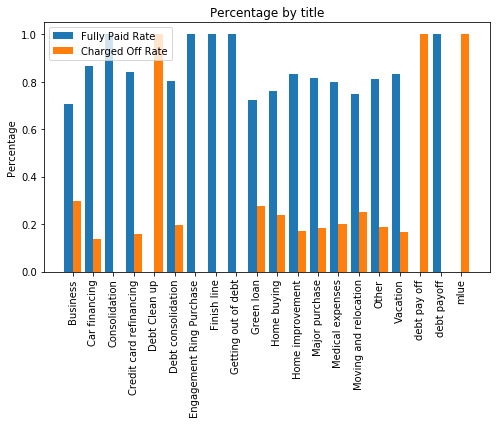

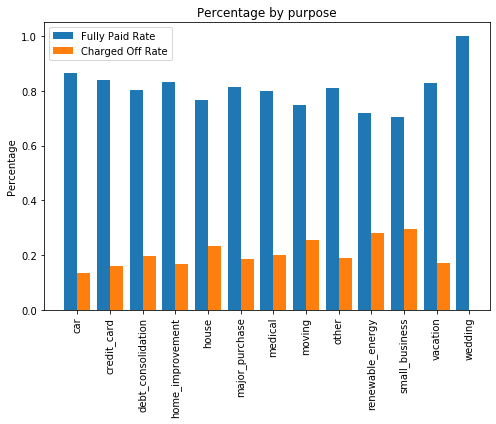

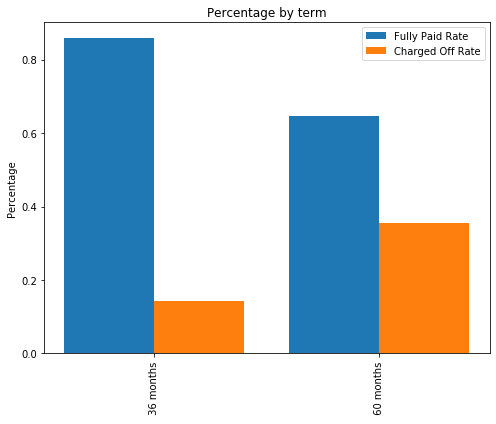

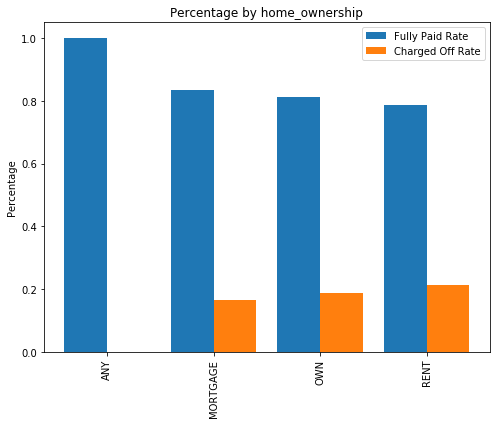

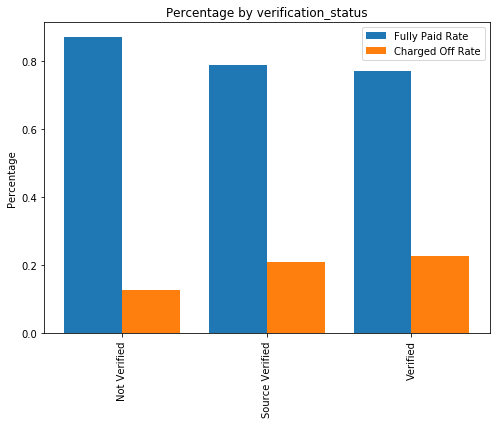

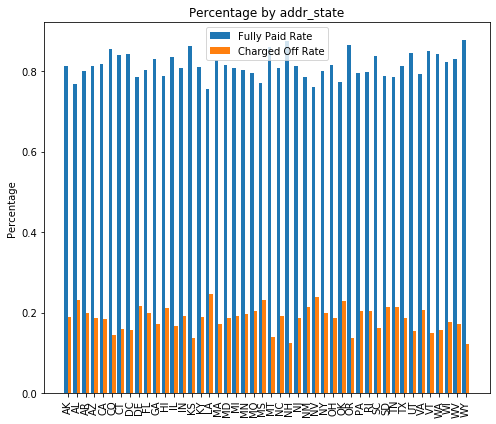

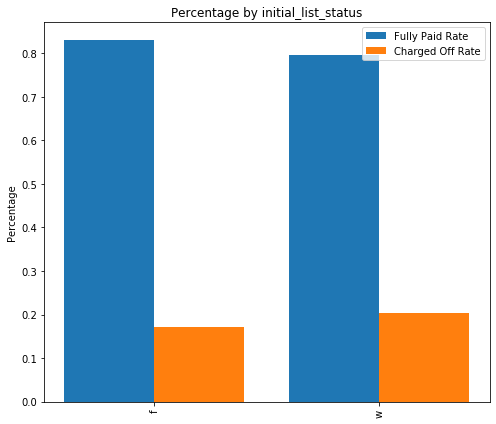

In [154]:
plot_function(feature='title', dataset = dataset_1,width=0.4)
plot_function(feature='purpose', dataset = dataset_1,width=0.4)
plot_function(feature='term', dataset = dataset_1,width=0.4)
plot_function(feature='home_ownership', dataset = dataset_1,width=0.4)
plot_function(feature='verification_status',dataset = dataset_1,width=0.4)
plot_function(feature='addr_state',dataset = dataset_1,width=0.4)
plot_function(feature='initial_list_status',dataset = dataset_1,width=0.4)

### Explain the reason that we drop the purpose here

In [155]:
# DO THIS HERE
droplist=['zip_code','earliest_cr_line','application_type','emp_title','purpose']
for i in range(len(droplist)):
    dataset_1 = dataset_1.drop([droplist[i]],axis=1)
dataset_1

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,title,addr_state,dti,fico_range_low,fico_range_high,open_acc,revol_util,initial_list_status,last_pymnt_amnt,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl
0,15000.0,15000.0,60 months,12.39,336.64,C,C1,10+ years,RENT,78000.0,Source Verified,0,Debt consolidation,VA,12.03,750.0,754.0,6.0,29.0,w,12017.81,5.0,29828.0,9525.0,4.7,244.0,1.0,0.0,4.0
2,21425.0,21425.0,60 months,15.59,516.36,D,D1,6 years,RENT,63800.0,Source Verified,0,Credit card refinancing,MO,18.49,685.0,689.0,10.0,76.2,w,17813.19,4.0,4232.0,324.0,97.8,136.0,7.0,0.0,4.0
5,9600.0,9600.0,36 months,13.66,326.53,C,C3,10+ years,RENT,69000.0,Source Verified,0,Debt consolidation,NJ,25.81,680.0,684.0,12.0,59.4,f,9338.58,8.0,3214.0,6494.0,69.2,265.0,23.0,0.0,7.0
6,2500.0,2500.0,36 months,11.99,83.03,B,B5,< 1 year,MORTGAGE,89000.0,Source Verified,0,Home improvement,MN,13.77,685.0,689.0,9.0,94.3,f,2294.26,6.0,44136.0,1333.0,86.4,148.0,24.0,5.0,4.0
7,16000.0,16000.0,60 months,11.44,351.40,B,B4,6 years,OWN,109777.0,Verified,0,Debt consolidation,VA,11.63,700.0,704.0,7.0,60.4,w,4935.54,3.0,53392.0,2559.0,72.2,133.0,17.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99967,3600.0,3600.0,36 months,12.99,121.29,C,C1,1 year,OWN,52500.0,Not Verified,1,Other,CA,31.43,660.0,664.0,5.0,54.1,w,425.71,3.0,44549.0,1449.0,58.6,214.0,3.0,3.0,2.0
99978,28250.0,28250.0,60 months,15.61,681.15,D,D1,9 years,MORTGAGE,82000.0,Verified,1,Debt consolidation,GA,16.54,715.0,719.0,18.0,29.0,w,681.15,7.0,18704.0,45883.0,31.4,303.0,2.0,6.0,8.0
99986,19200.0,19200.0,36 months,6.03,584.37,A,A1,8 years,MORTGAGE,79000.0,Not Verified,1,Car financing,GA,8.61,830.0,834.0,7.0,9.0,f,584.37,1.0,24442.0,29266.0,11.0,255.0,88.0,1.0,1.0
99992,8800.0,8800.0,36 months,22.15,336.76,E,E5,3 years,MORTGAGE,62000.0,Verified,1,Debt consolidation,KY,21.45,675.0,679.0,15.0,32.9,f,336.76,14.0,10831.0,5378.0,28.3,115.0,2.0,1.0,6.0


### Convert Term to a numerical feature

In [156]:
dataset_1.term.unique()

array([' 60 months', ' 36 months'], dtype=object)

In [157]:
# convert the Term to numerical feature
term_values = {' 36 months':36, ' 60 months':60}
dataset_1['term'] = dataset_1.term.map(term_values)

In [159]:
dataset_1[['term']]

,term
0,60
2,60
5,36
6,36
7,60
...,...
99967,36
99978,60
99986,36
99992,36


### Decide if you want to do anything to emp_length

In [160]:
# Lets convert the labels to numeric values first
package = {'emp_length': {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, 
                         '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}}
dataset_1 = dataset_1.replace(package)

In [161]:
# Compute the fully paid rate and charged off rate for each label
for year in dataset_1.emp_length.unique():
    print(f"{year} fully paid and charged off rate:")
    print(f"{dataset_1[dataset_1.emp_length == year].loan_status.value_counts(normalize=True)}","\n")
    print('-----------------------------------------',"\n")

10.0 fully paid and charged off rate:
0    0.818079
1    0.181921
Name: loan_status, dtype: float64 

----------------------------------------- 

6.0 fully paid and charged off rate:
0    0.811358
1    0.188642
Name: loan_status, dtype: float64 

----------------------------------------- 

0.0 fully paid and charged off rate:
0    0.799433
1    0.200567
Name: loan_status, dtype: float64 

----------------------------------------- 

2.0 fully paid and charged off rate:
0    0.820366
1    0.179634
Name: loan_status, dtype: float64 

----------------------------------------- 

8.0 fully paid and charged off rate:
0    0.808984
1    0.191016
Name: loan_status, dtype: float64 

----------------------------------------- 

9.0 fully paid and charged off rate:
0    0.809067
1    0.190933
Name: loan_status, dtype: float64 

----------------------------------------- 

7.0 fully paid and charged off rate:
0    0.814273
1    0.185727
Name: loan_status, dtype: float64 

----------------------------

In [162]:
# We only concern about the charge off rate which is the default rate
chargeOff_rate =  dataset_1[dataset_1.loan_status==1]['emp_length'].value_counts().sort_index() / dataset_1['emp_length'].value_counts().sort_index()
chargeOff_rate

0.0     0.200567
1.0     0.190259
2.0     0.179634
3.0     0.184257
4.0     0.175262
5.0     0.172605
6.0     0.188642
7.0     0.185727
8.0     0.191016
9.0     0.190933
10.0    0.181921
Name: emp_length, dtype: float64

* We can see that the rates are not much different across different employment lengths, thus we drop this columns 

In [163]:
# DO THIS HERE
dataset_1 = dataset_1.drop(['emp_length'],axis=1)

### Is sub_grade worth keeping ?

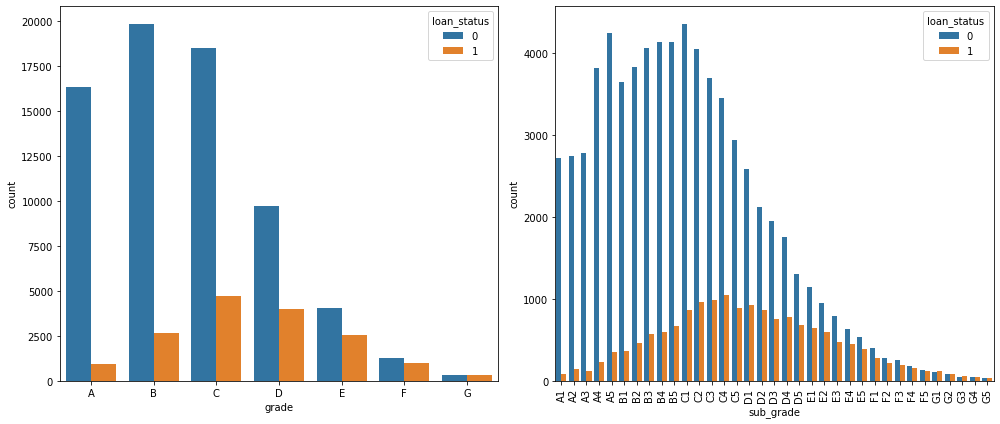

In [164]:
# Let look at the distribution of grade and sub_grade features
plt.figure(figsize=(14, 6))
# Plot by grade
plt.subplot(1,2,1)
grade = sorted(dataset_1.grade.unique().tolist())
sns.countplot(x='grade', data=dataset_1, hue='loan_status', order=grade)

# Plot by subgrade
plt.subplot(1,2,2)
sub_grade = sorted(dataset_1.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=dataset_1, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

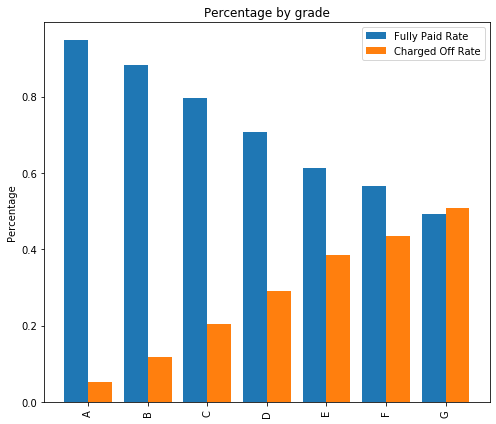

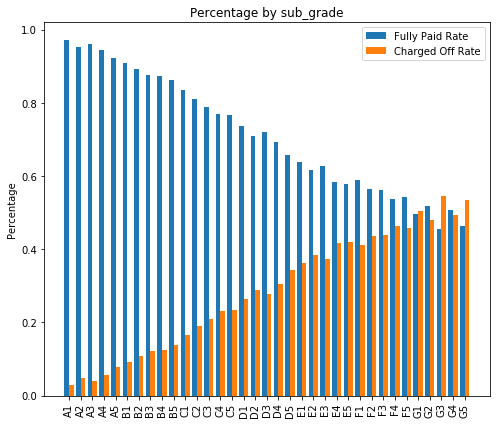

In [165]:
# compute and plot their chargeoff rate
plot_function(feature='grade', dataset = dataset_1,width=0.4)
plot_function(feature='sub_grade', dataset = dataset_1,width=0.4)

* Clearly we can see that the grade is implied by subgrade feature and they have nearly the same distribution in terms of both counts and percentage. *Thus we drop grade and keep the sub_grade feature*

In [166]:
# Drop grade
dataset_1 = dataset_1.drop(['grade'],axis=1)
dataset_1.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,title,addr_state,dti,fico_range_low,fico_range_high,open_acc,revol_util,initial_list_status,last_pymnt_amnt,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl
0,15000.0,15000.0,60,12.39,336.64,C1,RENT,78000.0,Source Verified,0,Debt consolidation,VA,12.03,750.0,754.0,6.0,29.0,w,12017.81,5.0,29828.0,9525.0,4.7,244.0,1.0,0.0,4.0
2,21425.0,21425.0,60,15.59,516.36,D1,RENT,63800.0,Source Verified,0,Credit card refinancing,MO,18.49,685.0,689.0,10.0,76.2,w,17813.19,4.0,4232.0,324.0,97.8,136.0,7.0,0.0,4.0
5,9600.0,9600.0,36,13.66,326.53,C3,RENT,69000.0,Source Verified,0,Debt consolidation,NJ,25.81,680.0,684.0,12.0,59.4,f,9338.58,8.0,3214.0,6494.0,69.2,265.0,23.0,0.0,7.0
6,2500.0,2500.0,36,11.99,83.03,B5,MORTGAGE,89000.0,Source Verified,0,Home improvement,MN,13.77,685.0,689.0,9.0,94.3,f,2294.26,6.0,44136.0,1333.0,86.4,148.0,24.0,5.0,4.0
7,16000.0,16000.0,60,11.44,351.40,B4,OWN,109777.0,Verified,0,Debt consolidation,VA,11.63,700.0,704.0,7.0,60.4,w,4935.54,3.0,53392.0,2559.0,72.2,133.0,17.0,2.0,3.0


<a id='3.1.2'></a>
### 4.1.2. Analysing the continuous features 

### Do you want to do anything to Annual Income ?

#### Feature : Annual Income

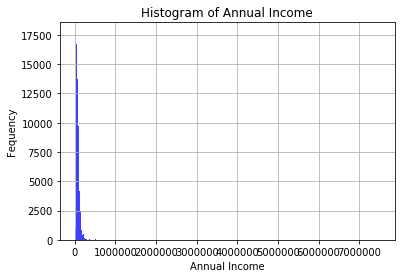

In [167]:
# plot the distribution of annual income
plt.hist(dataset_1['annual_inc'], bins = 500, facecolor='b', alpha=0.75) 
plt.xlabel('Annual Income')
plt.ylabel('Fequency')
plt.title('Histogram of Annual Income')
plt.grid(True)
plt.show()

* We can see that the annual income feature has many outliers

In [50]:
#dataset_1 = dataset_1[dataset_1['annual_inc'] < 250000]
#plt.hist(dataset_1['annual_inc'], bins = 50, facecolor='b', alpha=0.75) 
#plt.xlabel('Annual Income < 250000')
#plt.ylabel('Fequency')
#plt.title('Histogram of Annual Income < 250000')
#plt.grid(True)
#plt.show()

In [168]:
# Check the statistics of annual_income
dataset_1.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,69982.0,75277.520514,55816.645504,4000.0,45000.0,65000.0,90000.0,4900000.0
1,16156.0,67629.772470,72125.748438,4000.0,42000.0,59000.0,80000.0,7500000.0


### What do we do to annual income?

### How do you want to treat the two FICO scores ?

In [169]:
# check the data info and find the two FICO scores: FICO_range_low and FICO_range_high
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86138 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              86138 non-null  float64
 1   funded_amnt            86138 non-null  float64
 2   term                   86138 non-null  int64  
 3   int_rate               86138 non-null  float64
 4   installment            86138 non-null  float64
 5   sub_grade              86138 non-null  object 
 6   home_ownership         86138 non-null  object 
 7   annual_inc             86138 non-null  float64
 8   verification_status    86138 non-null  object 
 9   loan_status            86138 non-null  int64  
 10  title                  86138 non-null  object 
 11  addr_state             86138 non-null  object 
 12  dti                    86138 non-null  float64
 13  fico_range_low         86138 non-null  float64
 14  fico_range_high        86138 non-null  float64
 15  op

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

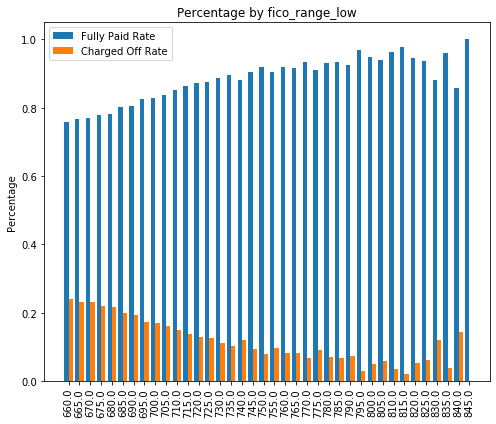

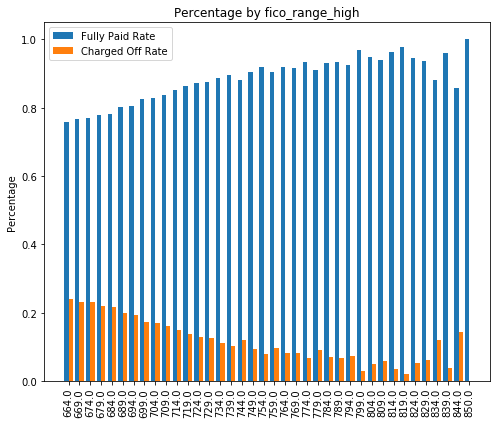

In [170]:
# plot their fully paid rate and defalut rate
fico_range = dataset_1
plot_function(feature='fico_range_low', dataset = dataset_1,width=0.4)
plot_function(feature='fico_range_high', dataset = dataset_1,width=0.4)

In [171]:
# we notice they have almost the same rate across different label, lets check their correlation to be certain
dataset_1[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


### <font color = 'red'> The two features are perfectly correlated! I take an average score of the two and replace the orginal ones here. We can drop one of them if you prefer doing that way

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

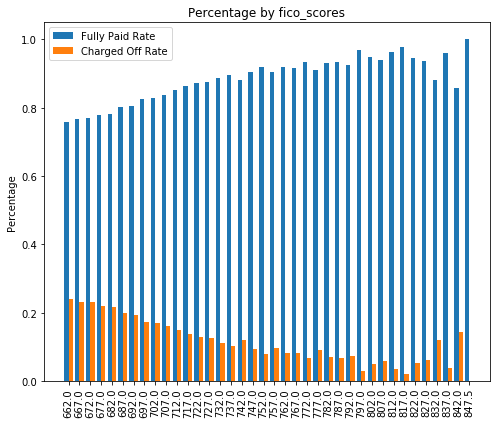

In [172]:
# compute the average score and replace the old two.
# plot the new feature
dataset_1['fico_scores'] = 0.5*(dataset_1['fico_range_low'] + dataset_1['fico_range_high'])
dataset_1.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)
plot_function(feature='fico_scores', dataset = dataset_1,width=0.4)

<a id='3.2'></a>
## 4.2. Encoding Categorical Data

### Decide how to handle the categorical data in columns ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type']

### You may wish to use a LabelEncoder


In [174]:
# We have already dropped grade,purpose,application_type 
categorical_features = dataset_1.select_dtypes(include=['object'])
categorical_features.head()

,sub_grade,home_ownership,verification_status,title,addr_state,initial_list_status
0,C1,RENT,Source Verified,Debt consolidation,VA,w
2,D1,RENT,Source Verified,Credit card refinancing,MO,w
5,C3,RENT,Source Verified,Debt consolidation,NJ,f
6,B5,MORTGAGE,Source Verified,Home improvement,MN,f
7,B4,OWN,Verified,Debt consolidation,VA,w


In [175]:
# Encode the categorical features above using LabelEncoder
for i in range(len(categorical_features.columns)):
    col_name = categorical_features.columns[i]
    X = categorical_features[[col_name]].values
    le = LabelEncoder()
    X[:,0] = le.fit_transform(X[:,0])
    categorical_features[col_name] = X[:,0] #update the orginal dataframe

In [176]:
# have a look at the encoded features
categorical_features.head()

,sub_grade,home_ownership,verification_status,title,addr_state,initial_list_status
0,10,3,1,5,40,1
2,15,3,1,3,21,1
5,12,3,1,5,26,0
6,9,1,1,11,20,0
7,8,2,2,5,40,1


In [177]:
# check the whole dataset after encoding
numerical_features = dataset_1.select_dtypes(exclude=['object'])
dataset_loans = pd.concat([numerical_features,categorical_features],axis=1)
dataset_loans

,loan_amnt,funded_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,revol_util,last_pymnt_amnt,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl,fico_scores,sub_grade,home_ownership,verification_status,title,addr_state,initial_list_status
0,15000.0,15000.0,60,12.39,336.64,78000.0,0,12.03,6.0,29.0,12017.81,5.0,29828.0,9525.0,4.7,244.0,1.0,0.0,4.0,752.0,10,3,1,5,40,1
2,21425.0,21425.0,60,15.59,516.36,63800.0,0,18.49,10.0,76.2,17813.19,4.0,4232.0,324.0,97.8,136.0,7.0,0.0,4.0,687.0,15,3,1,3,21,1
5,9600.0,9600.0,36,13.66,326.53,69000.0,0,25.81,12.0,59.4,9338.58,8.0,3214.0,6494.0,69.2,265.0,23.0,0.0,7.0,682.0,12,3,1,5,26,0
6,2500.0,2500.0,36,11.99,83.03,89000.0,0,13.77,9.0,94.3,2294.26,6.0,44136.0,1333.0,86.4,148.0,24.0,5.0,4.0,687.0,9,1,1,11,20,0
7,16000.0,16000.0,60,11.44,351.40,109777.0,0,11.63,7.0,60.4,4935.54,3.0,53392.0,2559.0,72.2,133.0,17.0,2.0,3.0,702.0,8,2,2,5,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99967,3600.0,3600.0,36,12.99,121.29,52500.0,1,31.43,5.0,54.1,425.71,3.0,44549.0,1449.0,58.6,214.0,3.0,3.0,2.0,662.0,10,2,0,15,4,1
99978,28250.0,28250.0,60,15.61,681.15,82000.0,1,16.54,18.0,29.0,681.15,7.0,18704.0,45883.0,31.4,303.0,2.0,6.0,8.0,717.0,15,1,2,5,10,1
99986,19200.0,19200.0,36,6.03,584.37,79000.0,1,8.61,7.0,9.0,584.37,1.0,24442.0,29266.0,11.0,255.0,88.0,1.0,1.0,832.0,0,1,0,1,10,0
99992,8800.0,8800.0,36,22.15,336.76,62000.0,1,21.45,15.0,32.9,336.76,14.0,10831.0,5378.0,28.3,115.0,2.0,1.0,6.0,677.0,24,1,2,5,15,0


### Question: anything to do to the funded_amount and loan_amount? they are completely the same

In [60]:
#Notice that the loan_amnt and funded_amount are same
#dataset_loans = dataset_loans.drop(['loan_amnt'],axis=1)

<a id='3.4'></a>
## 4.3. Sampling Data

### To create a balanced dataset, draw 5500 rows at random from each of the two classes and combine them into a new dataframe.

In [178]:
# split the fully paid and charge off classes in order to draw data from them
loans_0 = dataset_loans[dataset_loans.loan_status == 0]
loans_1 = dataset_loans[dataset_loans.loan_status == 1]
print(loans_0.shape)
print(loans_1.shape)

(69982, 26)
(16156, 26)


In [179]:
# draw 5500 rows randomly from fully paid class
loans0_5500 = loans_0.sample(n=5500,random_state=1)

In [180]:
# draw 5500 rows from charged off class
loans1_5500 = loans_1.sample(n=5500,random_state=1)

In [181]:
# Combine the 2 class and creat a balanced dataset
loans_new = pd.concat([loans0_5500,loans1_5500],axis=0)
loans_new.index = np.arange(11000)
loans_new

,loan_amnt,funded_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,revol_util,last_pymnt_amnt,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl,fico_scores,sub_grade,home_ownership,verification_status,title,addr_state,initial_list_status
0,9000.0,9000.0,36,9.17,286.92,76000.0,0,4.79,7.0,12.1,282.43,2.0,1673.0,34438.0,12.1,472.0,0.0,0.0,4.0,662.0,5,2,0,5,4,1
1,17500.0,17500.0,60,21.99,483.24,45000.0,0,31.44,15.0,52.0,1162.47,5.0,11319.0,22555.0,54.5,176.0,6.0,4.0,6.0,707.0,24,1,1,3,12,1
2,30000.0,30000.0,60,11.44,658.88,84739.0,0,23.17,15.0,38.5,29154.95,2.0,15413.0,9610.0,52.7,150.0,26.0,4.0,5.0,742.0,8,1,2,5,29,1
3,6000.0,6000.0,36,7.69,187.17,58000.0,0,15.27,11.0,79.8,1287.14,0.0,3567.0,622.0,90.7,108.0,58.0,0.0,3.0,692.0,3,3,0,3,17,1
4,6000.0,6000.0,36,14.31,205.98,70000.0,0,16.03,9.0,20.0,5969.68,6.0,46456.0,31600.0,21.0,190.0,13.0,4.0,1.0,677.0,13,1,0,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,22750.0,22750.0,60,23.43,646.97,60000.0,1,17.88,4.0,93.6,646.97,1.0,16241.0,794.0,93.6,258.0,69.0,0.0,1.0,697.0,25,3,1,5,4,1
10996,15550.0,15550.0,60,24.99,456.33,52000.0,1,20.33,9.0,85.9,456.33,6.0,2518.0,0.0,100.4,125.0,0.0,0.0,4.0,672.0,28,3,2,5,33,1
10997,4800.0,4800.0,36,13.98,164.01,90000.0,1,36.79,13.0,44.1,164.01,11.0,10026.0,15094.0,0.0,485.0,4.0,0.0,2.0,757.0,12,3,2,5,29,0
10998,10000.0,10000.0,60,17.57,251.61,39000.0,1,20.55,10.0,33.4,251.61,7.0,3196.0,11180.0,36.5,32.0,17.0,0.0,6.0,677.0,18,3,1,5,37,1


### Choose a method to handle any NAs that may be in a column.

In [182]:
# have a look at the new dataset info
loans_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 10999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              11000 non-null  float64
 1   funded_amnt            11000 non-null  float64
 2   term                   11000 non-null  int64  
 3   int_rate               11000 non-null  float64
 4   installment            11000 non-null  float64
 5   annual_inc             11000 non-null  float64
 6   loan_status            11000 non-null  int64  
 7   dti                    11000 non-null  float64
 8   open_acc               11000 non-null  float64
 9   revol_util             10996 non-null  float64
 10  last_pymnt_amnt        11000 non-null  float64
 11  acc_open_past_24mths   11000 non-null  float64
 12  avg_cur_bal            11000 non-null  float64
 13  bc_open_to_buy         10856 non-null  float64
 14  bc_util                10847 non-null  float64
 15  mo

### <font color='red'> Not too many missing values, unlikely causing serious problems. I fill the NAs using ffill here

In [183]:
# Fill the NA with the previous value
loans_new = loans_new.fillna(method='ffill')
loans_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 10999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              11000 non-null  float64
 1   funded_amnt            11000 non-null  float64
 2   term                   11000 non-null  int64  
 3   int_rate               11000 non-null  float64
 4   installment            11000 non-null  float64
 5   annual_inc             11000 non-null  float64
 6   loan_status            11000 non-null  int64  
 7   dti                    11000 non-null  float64
 8   open_acc               11000 non-null  float64
 9   revol_util             11000 non-null  float64
 10  last_pymnt_amnt        11000 non-null  float64
 11  acc_open_past_24mths   11000 non-null  float64
 12  avg_cur_bal            11000 non-null  float64
 13  bc_open_to_buy         11000 non-null  float64
 14  bc_util                11000 non-null  float64
 15  mo

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

### Use an 80:20 split

In [184]:
# split the target feature
loans_features = loans_new.drop(['loan_status'],axis=1)
loans_target = loans_new[['loan_status']]

In [185]:
# train-test split as required
X_train,X_test,y_train,y_test = train_test_split(loans_features,loans_target,test_size=0.2)

In [186]:
# check training set shape
print(X_train.shape)
print(y_train.shape)

(8800, 25)
(8800, 1)


In [187]:
# check testing set shape
print(X_test.shape)
print(y_test.shape)

(2200, 25)
(2200, 1)


<a id='4.2'></a>
## 5.2. Test Options and Evaluation Metrics


### Use K-Folds cross validation with 10 folds and 'roc-auc' as your score.

In [188]:
# DO THIS HERE
k_fold = KFold(n_splits=10)

In [189]:
# obtain 10 folds through KFold split
for train, test in k_fold.split(X_train):
    print(train.shape,test.shape)

(7920,) (880,)
(7920,) (880,)
(7920,) (880,)
(7920,) (880,)
(7920,) (880,)
(7920,) (880,)
(7920,) (880,)
(7920,) (880,)
(7920,) (880,)
(7920,) (880,)


In [190]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

<a id='4.3'></a>
## 5.3. Compare Models and Algorithms

### Use a wide range of classification models. I have added them below to a Python list.

In [191]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# Neural Network
models.append(('NN', MLPClassifier()))
# Boosting methods
models.append(('AB',AdaBoostClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))

### K-folds cross validation

In [192]:
# Do a K-fold cross validation using roc_auc score, print the results
result = {}
for model in models:

    print("----------------------------------------------------","\n")    
    print(model[1].__class__)         
    scores = cross_val_score(model[1],X_train,y_train,cv=k_fold,scoring="roc_auc")
    result[model[0]] = scores
    print("AUC Score = ", scores,"\n")
        
print("----------------------------------------------------","\n")

---------------------------------------------------- 

<class 'sklearn.linear_model._logistic.LogisticRegression'>
AUC Score =  [0.90294718 0.87927487 0.87828512 0.8956577  0.86307485 0.88202892
 0.87726438 0.89126469 0.87852927 0.89610349] 

---------------------------------------------------- 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
AUC Score =  [0.8055844  0.7701131  0.8134375  0.802104   0.76370052 0.80258762
 0.81341952 0.79331607 0.78791678 0.7955368 ] 

---------------------------------------------------- 

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
AUC Score =  [0.81345732 0.80089529 0.79204545 0.82154517 0.79305713 0.79913522
 0.80509373 0.79444539 0.82949974 0.78459598] 

---------------------------------------------------- 

<class 'sklearn.naive_bayes.GaussianNB'>
AUC Score =  [0.91380602 0.91087896 0.90206612 0.89913939 0.87612051 0.90229591
 0.9194415  0.89450535 0.90410561 0.90276313] 

-----------------------------------------------

In [76]:
# DO THIS HERE

### Plot a model comparison using a BoxPlot to capture the range of values coming from the K Folds for each model

In [193]:
df_auc = pd.DataFrame(result)
df_auc

,LR,KNN,DT,NB,NN,AB,RF
0,0.902947,0.805584,0.813457,0.913806,0.884342,0.940274,0.942449
1,0.879275,0.770113,0.800895,0.910879,0.906113,0.937567,0.939738
2,0.878285,0.813438,0.792045,0.902066,0.895992,0.920486,0.923373
3,0.895658,0.802104,0.821545,0.899139,0.898879,0.932365,0.929465
4,0.863075,0.763701,0.793057,0.876121,0.827461,0.914878,0.911359
5,0.882029,0.802588,0.799135,0.902296,0.898249,0.928950,0.937456
6,0.877264,0.813420,0.805094,0.919441,0.899806,0.933027,0.936711
7,0.891265,0.793316,0.794445,0.894505,0.885042,0.926842,0.925374
8,0.878529,0.787917,0.829500,0.904106,0.881691,0.931909,0.944412
9,0.896103,0.795537,0.784596,0.902763,0.812388,0.930185,0.934595


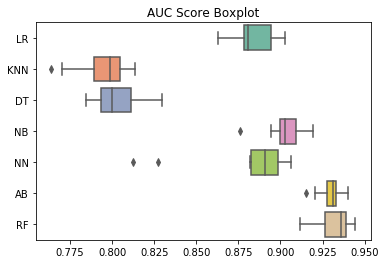

In [194]:
# boxplot to capture the range of values for each model
#plt.boxplot(df_auc.T,vert=False,showmeans=True)
#plt.title('Boxplot of AUC Scores for different models')
sns.boxplot(data=df_auc, orient="h", palette="Set2").set_title('AUC Score Boxplot');

* As we can see from the boxplot above, the RnadomForestClassifier algorithm has best AUC score, while the KNN is the worst model possibly because the model needs feature scalling, we will do this afterwards

In [197]:
# Average AUC score of models cross validation
df_auc.mean()

LR     0.884443
KNN    0.794772
DT     0.803377
NB     0.902512
NN     0.878996
AB     0.929648
RF     0.932493
dtype: float64

* Scale the dataset and rerun the all the models to see the differences

In [198]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
df_feature_std = pd.DataFrame()
for i in range(len(loans_new.columns)):
    scale = StandardScaler().fit_transform(loans_new[[loans_new.columns[i]]])
    scale = pd.DataFrame(scale,columns=[loans_new.columns[i]])
    df_feature_std = pd.concat([df_feature_std, scale],axis=1)

In [199]:
# repeat the train test split on the standardized dataset
loan_fts = df_feature_std.drop(['loan_status'],axis=1)
loans_sts = df_feature_std[['loan_status']]
x_train,x_test,Y_train,Y_test = train_test_split(loan_fts,loans_sts,test_size=0.2)

#check the shape
print(x_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8800, 25)
(2200, 25)
(8800, 1)
(2200, 1)


* Use Standardized data to run all models

In [200]:
result = {}
for model in models:

    print("----------------------------------------------------","\n")    
    print(model[1].__class__)         
    scores = cross_val_score(model[1],x_train,Y_train,cv=10,scoring="roc_auc")
    result[model[0]] = scores
    print("AUC Score = ", scores,"\n")
        
print("----------------------------------------------------","\n")

---------------------------------------------------- 

<class 'sklearn.linear_model._logistic.LogisticRegression'>
AUC Score =  [0.93098105 0.90522678 0.91404398 0.90939519 0.91863594 0.91778883
 0.92919385 0.92857401 0.92206612 0.92794421] 

---------------------------------------------------- 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
AUC Score =  [0.81797427 0.79159242 0.81454708 0.82424754 0.81297682 0.79699017
 0.81273405 0.79929907 0.80414256 0.78870868] 

---------------------------------------------------- 

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
AUC Score =  [0.79436102 0.80112759 0.81138332 0.82159774 0.78870242 0.81028053
 0.79662343 0.8045806  0.81136364 0.78068182] 

---------------------------------------------------- 

<class 'sklearn.naive_bayes.GaussianNB'>
AUC Score =  [0.91255637 0.8857742  0.89265957 0.88509755 0.89804441 0.89442611
 0.90229805 0.9103766  0.89844008 0.9063688 ] 

-----------------------------------------------

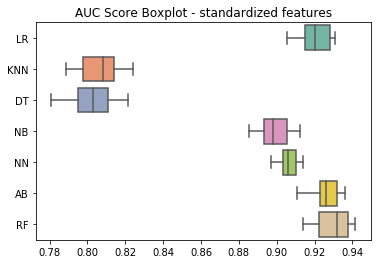

In [203]:
df_auc_new =  pd.DataFrame(result)
sns.boxplot(data=df_auc_new, orient="h", palette="Set2").set_title('AUC Score Boxplot - standardized features');

In [204]:
df_auc_new.mean()

LR     0.920385
KNN    0.806321
DT     0.802070
NB     0.898604
NN     0.905961
AB     0.925598
RF     0.929765
dtype: float64

In [207]:
# Lets check the difference before and after the standardization
df_auc_new.mean()-df_auc.mean()

LR     0.035942
KNN    0.011550
DT    -0.001307
NB    -0.003908
NN     0.026965
AB    -0.004051
RF    -0.002728
dtype: float64

### <font color = 'red'> After the standardization, Logistic model,KNN model and Neural network model perform better, the others perform worse. RandomForest model continues to be the best model.

<a id='5'></a>
# 6. Model Tuning and Grid Search

### Choose the best model and do some hyperparameter tuning by looping over the hyper parameters of the model to fine-tune the model. 

* We can see from the boxplot, the RandomForest model shows highest average auc score

In [209]:
best_model = RandomForestClassifier()
parameters = {'n_estimators':[100,150,200,300],'max_leaf_nodes':[10,20,30,40] }

In [210]:
# model tuning using grid search - original dataset not standardized
grid = GridSearchCV(best_model, parameters, verbose=3,scoring='roc_auc',return_train_score=True) 
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_leaf_nodes=10, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_leaf_nodes=10, n_estimators=100, score=(train=0.927, test=0.934), total=   0.7s
[CV] max_leaf_nodes=10, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_leaf_nodes=10, n_estimators=100, score=(train=0.931, test=0.922), total=   0.6s
[CV] max_leaf_nodes=10, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  max_leaf_nodes=10, n_estimators=100, score=(train=0.930, test=0.910), total=   0.7s
[CV] max_leaf_nodes=10, n_estimators=100 .............................
[CV]  max_leaf_nodes=10, n_estimators=100, score=(train=0.927, test=0.918), total=   0.6s
[CV] max_leaf_nodes=10, n_estimators=100 .............................
[CV]  max_leaf_nodes=10, n_estimators=100, score=(train=0.930, test=0.934), total=   0.6s
[CV] max_leaf_nodes=10, n_estimators=150 .............................
[CV]  max_leaf_nodes=10, n_estimators=150, score=(train=0.924, test=0.931), total=   0.9s
[CV] max_leaf_nodes=10, n_estimators=150 .............................
[CV]  max_leaf_nodes=10, n_estimators=150, score=(train=0.930, test=0.920), total=   1.0s
[CV] max_leaf_nodes=10, n_estimators=150 .............................
[CV]  max_leaf_nodes=10, n_estimators=150, score=(train=0.930, test=0.911), total=   0.9s
[CV] max_leaf_nodes=10, n_estimators=150 .............................
[CV]  max_leaf_nodes=10, n_estimat

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [211]:
# DO THIS HERE
grid.best_params_

{'max_leaf_nodes': 40, 'n_estimators': 300}

<a id='6'></a>
# 7. Finalise the Model

### Finalize Model with best parameters found during tuning step.

In [212]:
# DO THIS HERE
final_model = RandomForestClassifier(max_leaf_nodes= 40, n_estimators= 300, random_state=111)

<a id='6.1'></a>
## 7.1. Results on the Test Dataset

### Calculate the fine-tuned model results on the test dataset. Calculate accuracy, confusion matrix, the classification report.

[[867 240]
 [127 966]]
Test Accuracy: 0.833


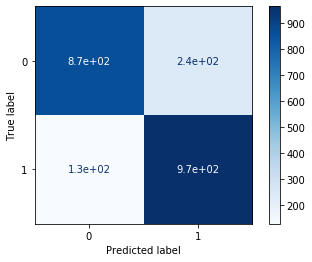

In [213]:
# DO THIS HERE
final_model.fit(X_train,y_train)
predictions = final_model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
print(cm)
print('Test Accuracy: %.3f' % final_model.score(X_test, y_test))
plot_confusion_matrix(final_model, X_test, y_test,cmap=mpl.cm.Blues)

In [214]:
# DO THIS HERE
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1107
           1       0.80      0.88      0.84      1093

    accuracy                           0.83      2200
   macro avg       0.84      0.83      0.83      2200
weighted avg       0.84      0.83      0.83      2200



In [215]:
# DO THIS HERE
def plotROCCurve(fpr_v,tpr_v):
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_v, tpr_v)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')

AUC: 0.9224704140911492


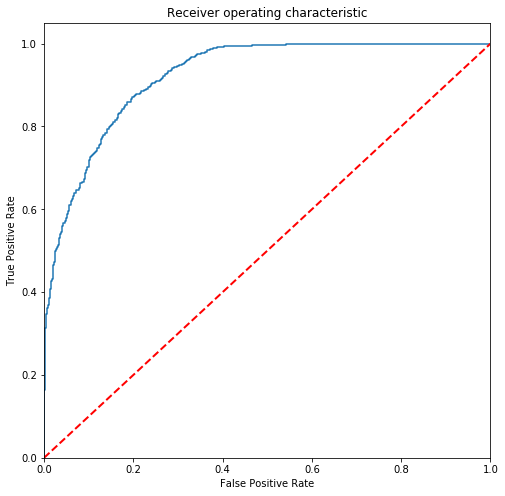

In [216]:
y_score = final_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plotROCCurve(fpr,tpr)
area = auc(fpr,tpr)
print("AUC:", area)

### Calculate the ROC curve for the model

<a id='6.2'></a>
## 7.2. Variable Intuition/Feature Importance
Looking at the details above GBM might be worthy of further study.
Let us look into the Feature Importance of the GBM model

### Examine the importance of each of the model features. Some models may have a features_importances property. For others you may need to loop over features and exclude/include them to determine their impact on the score.

In [217]:
# DO THIS HERE
feature_names = loans_features.columns
n_feats = len(feature_names)

In [221]:
model_list = []
for i in range(len(models)):
    model_list.append((models[i][1]))
rfe_model_list = [model_list[0],model_list[2],model_list[6]] #model list to use RFE method
loop_model_list = [model_list[1],model_list[3],model_list[4],model_list[5]] #model list to loop over

### <font color='red'> Warning: running next step cost me 9 min.

In [222]:
# DO THIS HERE
for model in loop_model_list:

    print("----------------------------------------------------")    
    print(model.__class__)
    scores_list = []

    for i in range(n_feats):
        X_one_feature = np.array(X_train.iloc[:, i]).reshape(-1,1)
        scores = cross_val_score(model, X_one_feature, y_train, cv=k_fold)
        scores_mean = scores.mean()
        scores_list.append(scores.mean())

    sorted_indices = np.argsort(np.array(scores_list) * -1) # negate to have descending

    for i in range(0,5): # top 5 features
        index = sorted_indices[i]
        print(i, ":", feature_names[index], scores_list[index])
    
print("----------------------------------------------------")

----------------------------------------------------
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
0 : last_pymnt_amnt 0.8136363636363637
1 : int_rate 0.6118181818181819
2 : sub_grade 0.5921590909090908
3 : installment 0.5648863636363636
4 : initial_list_status 0.5225
----------------------------------------------------
<class 'sklearn.naive_bayes.GaussianNB'>
0 : last_pymnt_amnt 0.7945454545454546
1 : int_rate 0.6532954545454546
2 : sub_grade 0.6532954545454546
3 : term 0.6182954545454546
4 : fico_scores 0.5628409090909091
----------------------------------------------------
<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
0 : last_pymnt_amnt 0.7565909090909091
1 : sub_grade 0.6527272727272727
2 : int_rate 0.6519318181818182
3 : term 0.6182954545454546
4 : verification_status 0.5605681818181818
----------------------------------------------------
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
0 : last_pymnt_amnt 0.817272727272727

In [223]:
# DO THIS HERE
for model in rfe_model_list:
    
    print("-------------------------------------------------")
    
    rfe = RFE(estimator=model, n_features_to_select=5)
    
    print(model.__class__)
    rfe.fit(X_train, y_train)

    for i in range(0,n_feats):
        if rfe.support_[i] == True:
            print(feature_names[i], end="\n")
    print("")

-------------------------------------------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
acc_open_past_24mths
mort_acc
sub_grade
home_ownership
initial_list_status

-------------------------------------------------
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
term
installment
dti
last_pymnt_amnt
avg_cur_bal

-------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
installment
dti
last_pymnt_amnt
avg_cur_bal
sub_grade



### Conclusion

### Write a summary of what you have found.

In [100]:
# DO THIS HERE